### Tensorflow looks like below 



In [5]:
import tensorflow as tf 
# constant 
const = tf.constant('hello world, hello tensorflow')

with tf.Session() as sess :
    _const = sess.run(const)
    print(_const)

b'hello world, hello tensorflow'


### Advantages 

 * GPU 사용 
 * 쉬운 분산 처리 
 * 개발을 도와주는 여러가지 Wrapper 
 * 유연한 개발환경 $\rightarrow $ Mobile, backend, cloud(GCP), RaspberryPi등으로 포팅가능, 
 * 배포가 쉬움
 * Google Cloud Platform과의 연계성 (ML Machine)
 
 
### Basic 

 * Define and Run 방식 (compile(build) and execute)
    > (내부적으로) `Graph`로 **Define** 
    > , `Session`으로 **Run**
    
 * tensors 
     - constant 
     - placeholder 
     - Variable 
     - etc... 

In [6]:
# Define 
const = tf.constant('hello world, hello tensorflow')
# Run
with tf.Session() as sess :
    _const = sess.run(const)
    print(_const)

b'hello world, hello tensorflow'


### Graph & Session

 - Graph로 연산을 수행한다.
     - Define 된 모든 Tensor, operator 
     - 연산 구조를 각 Tensor, Operator 가 Node로 이루어진 Graph로 정의 
     - Session으로 실행 (run)
     
 - Defined 된 Graph의 연산을 수행
     - CPU, GPU 선택적으로 연산 수행 가능
     
 #### Tensors

In [14]:
# Define tensors
tf_str = tf.constant('hello')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)
print(tf_str)
print(tf_int)
print(tf_float)

# Run them
with tf.Session() as sess :
    _tf_str = sess.run(tf_str)
    _tf_int = sess.run(tf_int)
    _tf_float = sess.run(tf_float)
    print(_tf_str)
    print(_tf_int)
    print(_tf_float)

# objects` method 
print(tf_str.name)
print(tf_int.shape)
print(tf_float.dtype)

Tensor("Const_13:0", shape=(), dtype=string)
Tensor("Const_14:0", shape=(), dtype=int32)
Tensor("Const_15:0", shape=(), dtype=float32)
b'hello'
10
3.14
Const_13:0
()
<dtype: 'float32'>


#### Operators 

In [17]:
ones = tf.constant([[1, 1, 1]])
twos = tf.constant([[2], [2], [2]])
# inner product
matmul = tf.matmul(ones, twos)
print(matmul)
print("-" * 30 )
with tf.Session() as sess :
    print(sess.run(matmul))

Tensor("MatMul_1:0", shape=(1, 1), dtype=int32)
------------------------------
[[6]]


In [18]:
one = tf.constant([[1,1,1]])
two = tf.constant([[2],[2],[2]])
nine = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matmul = tf.matmul(one, two)
print(matmul)

matmul_2 = tf.matmul(nine, two)
print(matmul_2)
one.shape, two.shape, nine.shape

Tensor("MatMul_2:0", shape=(1, 1), dtype=int32)
Tensor("MatMul_3:0", shape=(3, 1), dtype=int32)


(TensorShape([Dimension(1), Dimension(3)]),
 TensorShape([Dimension(3), Dimension(1)]),
 TensorShape([Dimension(3), Dimension(3)]))

### Tensors 

##### constant - static values 
        
##### placeholder
    - tensor이지만, Session 에서 mapping 을 해주기 때문에 값은 안 들어가있다. 
    - 데이터를 변화시키며, Session에 넣으려면, 이렇게 해야한다.(iterator 같은 느낌 ) 

In [ ]:
data = [1, 2, 3, 4, 5]
pl_data = tf.placeholder(tf.float32)

with tf.Session() as sess:
    print(sess.run(pl_data, {pl_data: data}))# run시점을 정해주는 것 (patch)
                             # 이부분, Feeding, turneling  

##### Variable 
 - constant는 컴퓨터가 바꿀 수 없는 값, 고정된 값 
 - Variable은 initializing 해주어야 한다.
 - ** machine learning 에서 weight를 저장 하는 것 **

In [23]:
var = tf.Variable(10)

with tf.Session() as sess : 
    sess.run(tf.global_variables_initializer())
    print(sess.run(var))
    var = var * 2
    print(sess.run(var))

10
20


In [25]:
two = tf.constant([[2],[2],[2]])
nine = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
var = tf.Variable(10)

pl_data_for_sumation = tf.placeholder(tf.float32)

with tf.Session() as sess : 
    _two = sess.run(two)
    _nine = sess.run(nine)
    matmul = sess.run(tf.matmul(_nine, _two))
    data = sess.run(pl_data_for_sumation, {pl_data_for_sumation : matmul})
    # 'data' becomes iterable object 
    for d in data:
        print(d)


[12.]
[30.]
[48.]


### Experiment
* Flow
 > - generating Data 
 > - Buliding Model 
 > - Training Model 
 > - Implementation 

1. Linear Regression
2. Logistic Regression 


###### Linear Regression

In [26]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

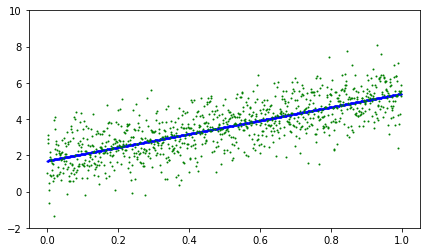

In [43]:
sample = 1000
data = np.array([1e-3 * float(i) for i in range(sample)]) # 데이터 
label = 3.7 * data + 1.7 + np.random.randn(sample)# <- 오차 ; 실제 데이터 
target = 3.7 * data+ 1.7 # ; 최종적으로 3.7, 1.7에 각각 수렴해야 함을 명시 

plt.figure(11, figsize=(7, 4))
plt.ylim(-2, 10)
plt.scatter(data, target, 1, "b")
plt.scatter(data, label, 1, 'g')
# plt.figure(21, figsize=(7, 4))
# plt.ylim(-2, 10)
# plt.scatter(data, target, 1, "b")

step : 0, loss : 5.780746936798096
step : 10, loss : 3.940840482711792
step : 20, loss : 2.83701753616333
step : 30, loss : 2.1737964153289795
step : 40, loss : 1.774335503578186
step : 50, loss : 1.5327959060668945
step : 60, loss : 1.385833740234375
step : 70, loss : 1.2955366373062134
step : 80, loss : 1.2392135858535767
step : 90, loss : 1.2032829523086548


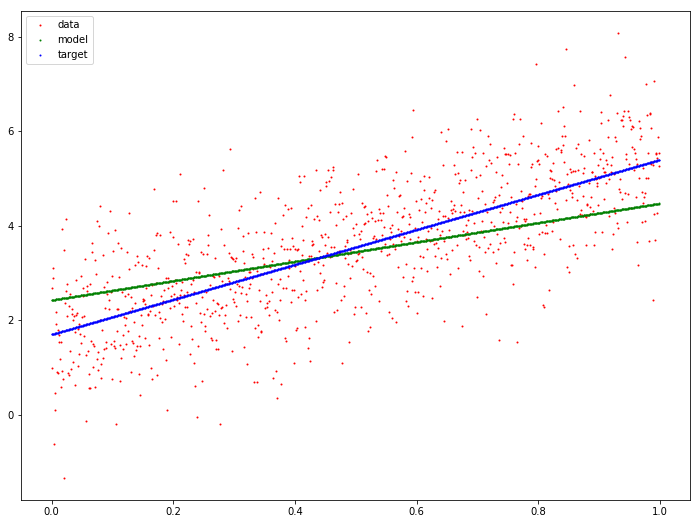

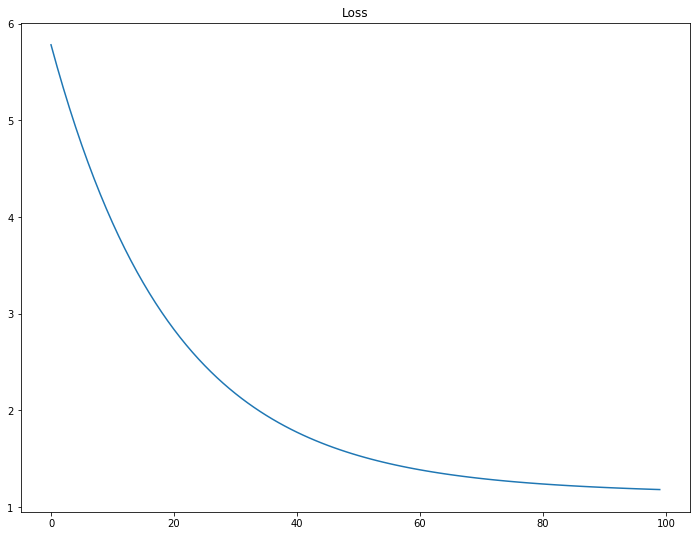

In [65]:
# feature와 label(truth)의 placeholder 
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32) # 진짜 y값 

w = tf.Variable(1.0) # Weight
b = tf.Variable(1.0) # bias which follows the Gaussian distribution ; w_0

y = w * x + b # Model 의 예측 값 

# loss function 정의 ; 간단하게 MSE
loss = tf.losses.mean_squared_error(y_, y)

# Optimizer 정의 
train_optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(loss)


# Session으로 Run 
with tf.Session() as sess : 
    # initializing variables
    sess.run(tf.global_variables_initializer())
    # 실제 label 값들 
    plt.figure(figsize=(12, 9))
    plt.scatter(data, label, 1, 'r')
    loses = [] # 로스를 시각하기 위해서 
    
    for i in range(100): # 100번 만 가중치를 업데이트 해보자 
        _, _loss = sess.run([train_optimizer, loss], feed_dict={x: data, y_ : label})
        loses.append(_loss)
        if i % 10 == 0: # 10 step 단위로 기록 
        
            print('step : {}, loss : {}'.format(i, _loss))
            
    _pred = sess.run(y, {x : data})# data로 예측한 결과값 
    
    plt.scatter(data, _pred, 1, 'g') # 결과 모델의 선 
    plt.scatter(data, target, 1, 'b')# 기준 선 
    plt.legend([u'data', u"model", u"target"], loc=0)

    plt.figure(figsize=(12, 9))
    plt.title("Loss")
    plt.plot(loses)
    plt.show()

###### Logistic Regression 

- Model 

> $ y = \dfrac{1}{1 + \exp^{-(wx + b)}} $

- Loss function 

> $ L(y^\prime, y) = \dfrac{1}{m}\sum_{n=1}^{m}-y^\prime \log y - (1 - y^\prime) \log (1-y) \leftarrow Cross entropy$



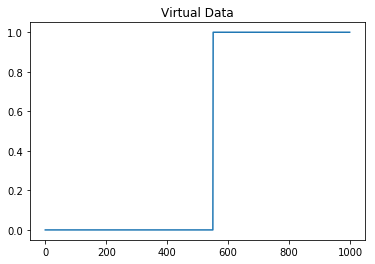

In [71]:
samples = 500
data = [float(i)*0.01 for i in range(-samples, samples)]
label = [1 if i>0.5 else 0 for i in data]

plt.plot(label)
plt.title("Virtual Data")
plt.show()

In [77]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

a = tf.Variable(0.3)
b = tf.Variable(0.3)
y = a*x + b

# Loss func - loss func에서 y 에 시그모이드(로지스틱 함수)를 씌워준다. 
loss = tf.losses.sigmoid_cross_entropy(y_, y)

# Optimizer
train_optimizer = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

step : 0, loss : 0.4356596767902374, a : 0.3068247139453888, b : 0.2988608181476593
step : 100, loss : 0.24576713144779205, a : 0.7137530446052551, b : 0.20688804984092712
step : 200, loss : 0.19611969590187073, a : 0.9224749207496643, b : 0.1361120343208313
step : 300, loss : 0.17100512981414795, a : 1.067877173423767, b : 0.0751141905784607
step : 400, loss : 0.15501287579536438, a : 1.1814547777175903, b : 0.020373474806547165
step : 500, loss : 0.14357754588127136, a : 1.2756588459014893, b : -0.02976645901799202
step : 600, loss : 0.1348145455121994, a : 1.3567391633987427, b : -0.07626605033874512
step : 700, loss : 0.12778563797473907, a : 1.4282984733581543, b : -0.11975442618131638
step : 800, loss : 0.12196299433708191, a : 1.4926137924194336, b : -0.1606777012348175
step : 900, loss : 0.11702310293912888, a : 1.5512183904647827, b : -0.19937022030353546


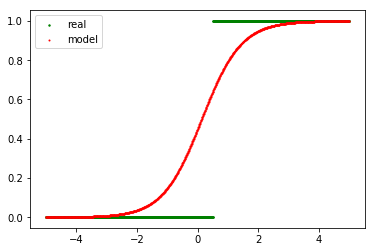

In [78]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.scatter(data, label, 2,'g')
    for i in range(1000):
        _train_op, _loss, _a, _b = sess.run([train_optimizer, loss, a, b], feed_dict={x : data, y_ : label})

        if i % 100 == 0 :
            #loss 함수 안에서는 자동으로 시그모이드를 씌워주지만, 여기서는 직접 넣어야 한다.        
            _pred = sess.run(tf.nn.sigmoid(y) , {x: data})
            
            print('step : {}, loss : {}, a : {}, b : {}'.format( i, _loss, _a, _b))
            
    plt.scatter(data, _pred, 1, 'r')
    plt.legend(["real", "model"])